## Import data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
us_a = pd.read_csv("/home/jupyter/Fiscal-Forecasting/data/United States_A.txt", delimiter="\t")
uk_a = pd.read_csv("/home/jupyter/Fiscal-Forecasting/data/United Kingdom_A.txt", delimiter="\t")
ger_a = pd.read_csv("/home/jupyter/Fiscal-Forecasting/data/Germany_A.txt", delimiter="\t")

In [3]:
us_q = pd.read_csv("/home/jupyter/Fiscal-Forecasting/data/United States.txt", delimiter="\t")
uk_q = pd.read_csv("/home/jupyter/Fiscal-Forecasting/data/United Kingdom.txt", delimiter="\t")
ger_q = pd.read_csv("/home/jupyter/Fiscal-Forecasting/data/Germany.txt", delimiter="\t")

In [4]:
us_a_macro = us_a[['DATE', 'CA', 'FA', 'DI', 'RESERV', 'IMP', 'EXP', 'LPROD', 'ULC', 'UNEMP',
                   'PUBCON', 'PRIVCON', 'CAPFORM', 'GAP', 'NATSAV', 'MGS', 'XGS', 'INFL']]

In [5]:
uk_a_macro = uk_a[['DATE', 'CA', 'FA', 'DI', 'RESERV', 'IMP', 'EXP', 'LPROD', 'ULC', 'UNEMP',
                   'PUBCON', 'PRIVCON', 'CAPFORM', 'GAP', 'NATSAV', 'MGS', 'XGS', 'INFL']]

Germany doesn't have any of the above indexes.

In [6]:
ger_a.columns

Index(['TIME', 'GDPt1', 'BCA_GDP_BP6', 'BF_GDP_BP6', 'BFD_GDP_BP6',
       'BFRA_GDP_BP6', 'BK_GDP_BP6', 'BOP_GDP_BP6', 'ENDA', 'FIDR_R', 'FIGB_R',
       'LHEM_PCH', 'LPROCM_PCH', 'LULCM_PCH', 'LUR', 'NCG_RPCH', 'NCP_RPCH',
       'NFDD_RPCH', 'NFI_RPCH', 'NGAP_R', 'NGSD_GDP', 'NK_R', 'NM_RPCH',
       'NSHR', 'NTDD_RPCH', 'NX_RPCH', 'PCPI_PCH', 'TBO'],
      dtype='object')

In [7]:
us_a.columns

Index(['DATE', 'GDPt1', 'GDPt', 'L2GDP', 'L3GDP', 'L4GDP', 'L5GDP', 'CA', 'FA',
       'DI', 'RESERV', 'IMP', 'EXP', 'INT', 'M3', 'LPROD', 'ULC', 'UNEMP',
       'PUBCON', 'PRIVCON', 'DDEM', 'CAPFORM', 'GAP', 'NATSAV', 'MGS',
       'SAVRATIO', 'XGS', 'INFL', 'B_PMI', 'B_UTIL', 'B_INDPROD', 'B_HOUSING',
       'B_AUTOS', 'B_CONCONF', 'B_OIL', 'B_SP500', 'BUR', 'RISK', 'CORRUPT',
       'DEMOCRACY', 'ECONRISK', 'ETHNIC', 'EXCONF', 'FINRISK', 'GOVSTAB',
       'INTCONF', 'INVPROF', 'LAWORD', 'MILITARY', 'POLRISK', 'RELITEN',
       'BUDGETRISK', 'CARISK', 'CARISKXGS', 'DEBTRISK', 'XRRISK', 'FDEBTRISK',
       'GDPRISK', 'INFLRISK', 'LIQRISK', 'CAPITARISK', 'SOCIOCON'],
      dtype='object')

In [8]:
us_a.head()

,DATE,GDPt1,GDPt,L2GDP,L3GDP,L4GDP,L5GDP,CA,FA,DI,...,CARISK,CARISKXGS,DEBTRISK,XRRISK,FDEBTRISK,GDPRISK,INFLRISK,LIQRISK,CAPITARISK,SOCIOCON
0,1984,4.238489,7.258908,4.632757,-1.911148,2.594413,-0.244348,-2.334793,1.255698,-0.199421,...,13.800000,10.333333,8.125000,9.666667,9.758333,9.200000,8.500000,2.625000,4.600000,10.666667
1,1985,3.512076,4.238489,7.258908,4.632757,-1.911148,2.594413,-2.718330,1.082786,-0.018842,...,12.741667,8.875000,8.000000,9.583333,10.000000,8.475000,8.500000,2.708333,4.266667,9.500000
2,1986,3.461612,3.512076,4.238489,7.258908,4.632757,-1.911148,-3.206361,2.336494,-0.248904,...,11.300000,8.750000,7.833333,10.000000,10.000000,7.500000,8.791667,2.125000,3.800000,9.000000
3,1987,4.204068,3.461612,3.512076,4.238489,7.258908,4.632757,-3.298841,1.725916,-0.481230,...,11.300000,8.791667,7.125000,10.000000,10.000000,7.500000,8.875000,2.541667,3.800000,9.000000
4,1988,3.680158,4.204068,3.461612,3.512076,4.238489,7.258908,-2.306637,2.013260,-0.670293,...,10.108333,9.375000,6.750000,10.000000,10.000000,6.766667,8.500000,2.166667,3.341667,8.083333


## PCA

In [9]:
samples = us_a.dropna().drop(['DATE'], axis=1)

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(samples)

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [12]:
new_X = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
new_X.head()

,PC1,PC2
0,-6.970589,-1.333367
1,-5.112484,-0.294188
2,-4.266847,0.294002
3,-4.228629,0.562121
4,-4.780580,1.843712


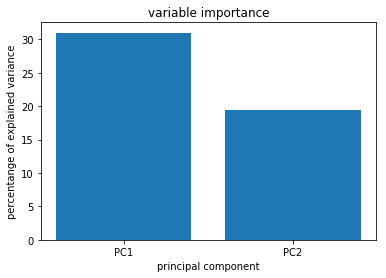

In [13]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('variable importance')
plt.show()

In [17]:
per_var.sum()

50.5

### Increase number of principal components

In [14]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X)

In [15]:
new_X_2 = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3', 
                                                    'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
new_X_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.970589,-1.333367,-1.313164,6.887498,-2.131555,0.340563,0.632149,-0.038152,-0.254965,-0.982329
1,-5.112484,-0.294188,2.799261,4.129422,-1.770942,-0.396871,-1.749622,-0.570654,-1.481300,-0.356696
2,-4.266847,0.294002,2.331815,1.931344,-1.525135,0.390098,-1.609653,-0.122233,-0.653171,3.327049
3,-4.228629,0.562121,0.884748,-0.336023,-2.232492,0.094581,-0.392636,1.723257,1.000275,1.703174
4,-4.780580,1.843712,0.532130,-1.133282,-1.168044,-1.543981,-0.621483,1.833442,1.885382,-1.229172


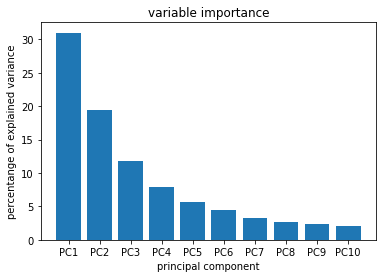

In [16]:
per_var_2 = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var_2) + 1)]
plt.bar(x=range(1, len(per_var_2)+1), height=per_var_2, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('variable importance')
plt.show()

In [18]:
per_var_2.sum()

90.5